In [1]:
!pip install -Uq openai-agents


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
import os 
from dotenv import load_dotenv , find_dotenv # For Loading environment variables
from agents.run import RunConfig

# Load environment variables from .env file
load_dotenv(find_dotenv())

# set SECRET_KEY environment variable
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
model="gemini-2.0-flash"
base_url="https://generativelanguage.googleapis.com/v1beta/openai/"

In [4]:
from agents import AsyncOpenAI , OpenAIChatCompletionsModel , set_tracing_disabled

set_tracing_disabled(True)

provider = AsyncOpenAI(
    api_key=GEMINI_API_KEY,
    base_url=base_url,
)

model = OpenAIChatCompletionsModel(
    openai_client=provider,
    model=model
)

config = RunConfig(
    model=model,
    tracing_disabled=True
)


In [ ]:
from agents import TResponseInputItem , Agent , Runner

simple_agent = Agent(
    name="simple_agent",
    instructions="You are a helpful assistant.",
    model=model
)


conva : list[TResponseInputItem] = [
    {"content" : "Hello!" , "role" : "user"},
    {"content" : "Hello! How can I help you today?" , "role" : "assistant"},
]

result = Runner.run_sync(simple_agent , conva , run_config=config)
print(result.final_output)

for message in result.to_input_list():
    print(message)


{'content': 'Hello!', 'role': 'user'}
{'content': 'Hello! How can I help you today?', 'role': 'assistant'}


In [6]:
conva : list[TResponseInputItem] = []
print("You are Talking To A Ai Chatbot Let Me Know How Can I Help You Today?")

while True:
    user_input = input(f"You :")
    print("You" + " : " + user_input)

    if user_input == "exit":
        print("GoodBye!")
        break

    conva.append({"content" : user_input , "role" : "user"})

    result = Runner.run_sync(simple_agent , conva , run_config=config)


    print(f"Agent {result.final_output}")

    conva = result.to_input_list()

    

You are Talking To A Ai Chatbot Let Me Know How Can I Help You Today?
You : Hi
Agent Hi there! How can I help you today?

You : exit
GoodBye!


In [7]:
web_developer = Agent(
    name="web_developer",
    instructions="You are expert in Full-stack web development",
    model=model
)

app_developer = Agent(
    name="app_developer",
    instructions="You are expert in responsive app development core concepts",
    model=model
)

Backend_develoepr = Agent(
    name="Backend_develoepr",
    instructions="You are expert in backend development",
    model=model
)

Dev_ops_expert = Agent(
    name="Dev_ops_expert",
    instructions="You are expert in DevOps",
    model=model
)

Agentic_AI_Expert = Agent(
    name="Agentic_AI_Expert",
    instructions="You are an Agentic AI Expert Solve All Problems About AI & Agentic AI. You are capable to use your Agents as a tool.",
    model=model,
    tools = [
        Backend_develoepr.as_tool(
            tool_name="Backend_develoepr",
            tool_description="You are expert in Backend Langueges and services."
        ),
        Dev_ops_expert.as_tool(
            tool_name="Dev_ops",
            tool_description="You are an Expert in devops services and cloud."
        )
    ],
)


panacloud_assistant = Agent(
    name="panacloud_assistat",
    instructions="you are expert in panacloud services and use your expert agent according to your Given Experts Agents.",
    model=OpenAIChatCompletionsModel(model="gemini/2.5-flash-exp" , openai_client=provider),
    handoffs = [web_developer , app_developer , Agentic_AI_Expert],
    handoff_description="You have multiple agents expert to use accourding to user query e:g. web_developer , app_developer , Agentic_AI_expert"
)

In [ ]:

from agents.extensions.visualization import draw_graph

graph = draw_graph(panacloud_assistant).view()
print(graph)

Source.gv.pdf


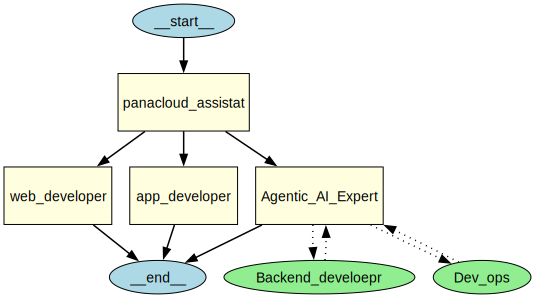

In [9]:

from agents.extensions.visualization import draw_graph

draw_graph(panacloud_assistant)


In [17]:
conva : list[TResponseInputItem] = []
print("You are Talking To A Ai Chatbot Let Me Know How Can I Help You Today?")
last_agent = panacloud_assistant

while True:
    user_input = input(f"You :")
    print("You" + " : " + user_input)

    if user_input == "exit":
        print("GoodBye!")
        break

    conva.append({"content" : user_input , "role" : "user"})

    result = Runner.run_sync(panacloud_assistant , conva , run_config=config)

    print(f"Last Agent: {last_agent.name}")
    print(f"Agent {result.final_output}")
    conva = result.to_input_list()
    
    last_agent = result.last_agent



You are Talking To A Ai Chatbot Let Me Know How Can I Help You Today?
You : Hi
Last Agent: panacloud_assistat
Agent How can I help you today?

You : Agentic Ai Explain
Last Agent: panacloud_assistat
Agent Agentic AI refers to a type of artificial intelligence that exhibits agency. In simpler terms, it's AI that can act independently to achieve specific goals. Here's a breakdown of what that means:

*   **Agency:** The core concept is "agency," which means the AI has the capacity to act or exert power. It's not just passively receiving instructions and executing them. Instead, it can:

    *   **Set its own goals (within defined boundaries):** An agentic AI might be given a high-level objective, and it's then responsible for breaking that down into smaller, manageable goals.
    *   **Make decisions:** It can evaluate different courses of action and choose the one that it believes will best achieve its goals.
    *   **Take actions:** It can interact with its environment (which could be